# Differential equations (symbolic)

This workbook uses symbolic computation to investigate the solutions of linear differential equations.

## First-order system

We consider a system governed by the differential equation
$$y(t) + RC \frac{dy(t)}{dt} = x(t)$$
where $x(t)$ is the input and $y(t)$ the output.  We want to find the step response of this system, or in other words the output of the system when the input is the unit step $x(t) = u(t)$.

## Basic code functionality

The cell below sets up the environment for symbolic computation.  The rest sets up the `display` function for a symbolic expression to make pretty output.

In [1]:
import sympy as sp
from IPython.display import display
sp.init_printing()  # pretty printing

We define `imp` as the Dirac delta or unit impulse $\delta(t)$, and `ustep` as the unit (or Heaviside) step function.  When the unit step is differentiated we get the unit impulse.  

In [2]:
# Define impulse and unit step as functions of t
t = sp.symbols('t');
imp = sp.DiracDelta(t);
ustep = sp.Heaviside(t);
#ustep = sp.Piecewise( (0, t<1), (1, True));  # diff() doesn't give delta function?!

# Derivative of step is impulse
display(ustep);
display(sp.diff(ustep, t));  # derivative is dirac delta
#sp.plot(ustep, (t,-4,4));  # sympy plot() not numpy plot()!

The next block sets up variables and defines the differential equation.  The `print` function on the symbolic expression gives the code representation of the relation, while `display` renders the result in a human friendly form.

Eq(RC*Derivative(y(t), t) + y(t), x(t))


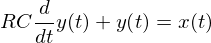

In [3]:
# Setup differential equation
x = sp.Function('x');  y = sp.Function('y');
RC = sp.symbols('RC');#, real=True);
lp1de = sp.Eq(y(t) + RC*sp.diff(y(t), t), x(t));

print(lp1de);  display(lp1de);

We can solve the differential equation for $y(t)$.  Note the result has an undetermined symbolic constant $C_1$ in the expression.  We will need to set its value based on an auxiliary constraint.

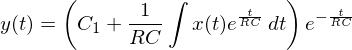

In [4]:
# Generic solution
y_sl0e = sp.dsolve(lp1de, y(t));
y_sl0r = y_sl0e.rhs  # take only right hand side

display(y_sl0e);  #display(y_sl0r);

To use the symbolic expresion above requirest specifying the value $C_1$.  The code below defines an equation for the initial value constraint of the form $y(-1) = a_0$, where $a_0$ is a symbolic variable.

Eq((C1 + Integral(x(t)*exp(t/RC), (t, -1))/RC)*exp(1/RC), a0)


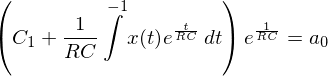

In [5]:
# Initial condition
a0 = sp.symbols('a0');
cnd1 = sp.Eq(y_sl0r.subs(t, -1), a0);  # y(-1) = a0
#cnd2 = sy.Eq(y_sl0.diff(t).subs(t, 0), b0)  # y'(0) = b0

print(cnd1);  display(cnd1);

We want to solve the above expression for $C_1$ so that we can substitute back into our generic solution.  The result is returned in a form useful later.

{C1: a0*exp(-1/RC) - Integral(x(t)*exp(t/RC), (t, -1))/RC}


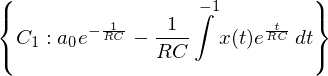

In [6]:
# Solve for C1:  magic brackets in solve() returns result as dictionary
C1 = sp.symbols('C1')  # generic constants
C1_sl = sp.solve([cnd1], (C1))

print(C1_sl);  display(C1_sl);

Substituting the expression obtained into the generic solution gives the solution expressed in terms of the initial value $a_0$ based on the constraint $y(-1) = a_0$.

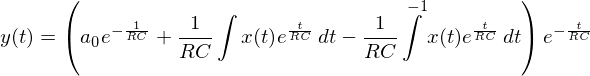

In [7]:
# Substitute back for solution in terms of a0
y_sl1 = y_sl0r.subs(C1_sl);

display(sp.Eq(y(t), y_sl1))

At this stage we're ready to substitute values and evaluate.  This problem specified requires the step response, where the onset of the step occurs at $t=0$.  We consider the case where the system was quiet before the step arrived, or an *initial rest* condition, so that $y(t)=0$ for $t<0$.  This constraint meanst hat $y(-1) = 0$, so specifying $a_0=0$ for the constraint equation is appropriate.  A value of $RC = 1$ is also assumed.

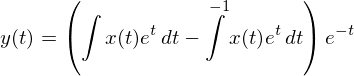

In [8]:
# Set values for constants
y_sl1s = y_sl1.subs({RC:1,a0:0}).doit()

display(sp.Eq(y(t), y_sl1s))

Finally we can make the substitution $x(t) = u(t)$ and evaluate the result.  This provides the output of the system when the input is the unit step, and is thus the required step response.

Eq(y(t), (exp(t) - 1)*exp(-t)*Heaviside(t))


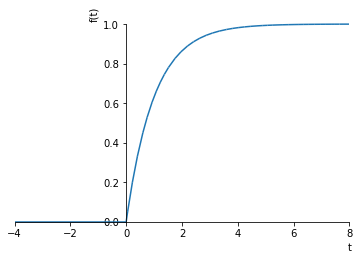

In [9]:
# Set input function and solve
y_sl1sx = y_sl1s.subs({x(t):ustep}).doit()

print(sp.Eq(y(t), y_sl1sx));  display(sp.Eq(y(t), y_sl1sx))
sp.plot(y_sl1sx, (t,-4,8))

## Code

The script below combines all the steps above to find and plot the step response.

In [10]:
%run src/labX_preamble.py  # For internal notebook functions

Eq(y(t), (exp(t) - 1)*exp(-t)*Heaviside(t))


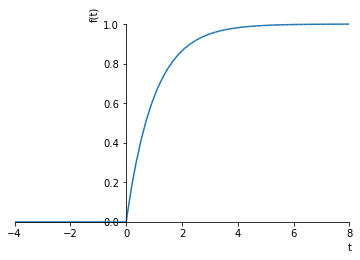

In [11]:
%%writefileexec src/lab_symdiffeq-1.py -s  # dump cell to file before execute

import sympy as sp
from IPython.display import display
sp.init_printing()  # pretty printing

# Define impulse and unit step as functions of t
t = sp.symbols('t');
imp = sp.DiracDelta(t);
ustep = sp.Heaviside(t);
#ustep = sp.Piecewise( (0, t<1), (1, True));  # diff() doesn't give delta function?!

# Setup differential equation
x = sp.Function('x');  y = sp.Function('y');
RC = sp.symbols('RC');#, real=True);
lp1de = sp.Eq(y(t) + RC*sp.diff(y(t), t), x(t));
#print(lp1de);  display(lp1de);

# Generic solution
y_sl0e = sp.dsolve(lp1de, y(t));
y_sl0r = y_sl0e.rhs  # take only right hand side
#print(y_sl0e);  display(y_sl0e);

# Initial condition
a0 = sp.symbols('a0');
cnd1 = sp.Eq(y_sl0r.subs(t, -1), a0);  # y(-1) = a0
#cnd2 = sp.Eq(y_sl0r.diff(t).subs(t, -1), b0)  # y'(-1) = b0
#print(cnd1);  display(cnd1);

# Solve for C1:  magic brackets in solve() returns result as dictionary
C1 = sp.symbols('C1')  # generic constants
C1_sl = sp.solve([cnd1], (C1))
#C1C2_sl = sp.solve([cnd1, cnd2], (C1, C2))
#print(C1_sl);  display(C1_sl);

# Substitute back for solution in terms of a0
y_sl1 = y_sl0r.subs(C1_sl);
#print(sp.Eq(y(t), y_sl1));  display(sp.Eq(y(t), y_sl1));

# Set values for constants
y_sl1s = y_sl1.subs({RC:1,a0:0}).doit()
#print(sp.Eq(y(t), y_sl1s));  display(sp.Eq(y(t), y_sl1s));

# Set input function and solve
y_sl1sx = y_sl1s.subs({x(t):ustep}).doit()
print(sp.Eq(y(t), y_sl1sx));  display(sp.Eq(y(t), y_sl1sx))

# Plot output
sp.plot(y_sl1sx, (t,-4,8))

# Tasks

These tasks involve writing code, or modifying existing code, to meet the objectives described.

1.  Find and plot the impulse responses of the first-order lowpass circuit for $RC = 1, 2, 4$ on the same set of axes and over the range $-4$ to 12.<br>
<br>
You should observe that the system reaches $1/e \approx 0.368$ of its initial value after time $\tau = RC$ has passed.  This is called the *time constant* or sometimes the *RC time constant*$ of the circuit.  A long time constant means that the circuit is slow to respond to changes, and involves a higher degree of lowpass filtering.<br><br>

2.  Any linear constant coefficient differential equation corresponds to a linear time invariant system.  Thus 
$$y(t) - 0.1 \frac{dy(t)}{dt} = x(t)$$
is a valid system.  It happens to correspond to a value of $RC=-0.1$ in the formulation above, so all the mathematics applies, although the system cannot be implemented with any real resistor and capacitor combination.  Find the step response of this system under initial rest conditions, and plot it over the range $t=-4$ to $t=12$.<br>
<br>
In this case the differential equation corresponds to an unstable system:  a bounded input can produce an unbounded output.<br><br>

3.  The RLC circuit 
![](figures/circuitlrc.png)
is governed by the second-order differential equation 
$$y(t) + \frac{L}{R} y'(t) + LC y''(t) = \frac{L}{R} x'(t).$$
On the same set of axes find and plot the step responses of the circuit over the range $t=-4$ to $t=12$ for $L=C=1$ and the cases $R=1/4$, $R=1/2$, and $R=1$.  Use the auxiliary condition $y(-1)=0$ as before, along with the additional condition $y'(-1)=0$.<br>
<br>
The quantity $\omega_0 = 1/\sqrt{LC}$ is the *resonant frequency* of the system and $\alpha = 1/(2RC)$ is the *damping attenuation*.  The three cases above respectively correspond to $\alpha>\omega_0$ (overdamped), $\alpha=\omega_0$ (critically damped), and $\alpha<\omega_0$ (underdamped).